<a href="https://colab.research.google.com/github/leticiagomescs/QuarentenaDados-Alura/blob/master/Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1> Aula 01 - Quarentena Dados

##Importando as Bibliotecas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

##Importando os conjuntos de dados

###Filmes

In [48]:
# Importando o conjunto de dados:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')

# Quais são as colunas do dataframe filmes:
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [0]:
# Renomeando as colunas do dataframe filmes:
filmes.columns = ['filmeId','titulo','generos']

Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. 

In [50]:
# Imprimindo as 5 primeiras linhas do dataframe:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Lendo a documentação de um método/atributo:
?filmes.head

###Avaliações dos filmes

In [52]:
# Importando o conjunto de dados: 
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

# Imprimindo as 5 primeiras linhas do dataframe: 
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


##Análise Exploratória

Para descobrir o tamanho do nosso dataframe podemos utilizar o comando ```avaliacoes.shape```, que retornará uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [53]:
# Lendo a quantidade de linhas e colunas do dataframe:
avaliacoes.shape

(100836, 4)

In [54]:
# Lendo a quantidade de linhas do dataframe:
len(avaliacoes)

100836

Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas. 

`usarioId`: ID para para usuário que votou em determinado filme.

`filmeId`: ID para identificar um filme votado.

`nota`: A nota dada para pelo usuário para o respectivo filme.

`momento`: A data da votação que não está formatada como data

Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos.

In [0]:
# Renomeando as colunas:
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?

Uma forma obter as informações apenas do filme cujo **Id = 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, **filmeId == 1**, for verdadeira.

In [0]:
# Selecionando um ID específico para analisar:
avaliacoes_filme1 = avaliacoes.query('filmeId == 1')

Tendo as informações do **filmeId == 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [57]:
# 
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média(`mean`), mediana(`median`) e desvio padrão(`std`) das avaliações do `filmeId == 1`.

> Indented block



In [58]:
# Obtendo a média:
avaliacoes_filme1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [59]:
# Obtendo a mediana:
avaliacoes_filme1.median()

usuarioId    2.900000e+02
filmeId      1.000000e+00
nota         4.000000e+00
momento      1.106855e+09
dtype: float64

In [60]:
# Obtendo o desvio padrão:
avaliacoes_filme1.std()

usuarioId    1.804198e+02
filmeId      0.000000e+00
nota         8.348591e-01
momento      2.393163e+08
dtype: float64

Calcularemos agora as estatísicas para o todo o dataframe **avaliações** com o método ```.describe()```. Ele nos retorna valores estatpisticos para todas as variáveis numéricas do conjunto de dados. 

In [61]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de [chave-valor dos dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python). 

Com o comando `avaliacoes['nota']`, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos `avaliacoes['nota'].means()`

In [62]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [63]:
avaliacoes["nota"].mean()

3.501556983616962

Podemos calcular também a nota média do `filmeId == 1`, repare que o resultado é um pouco maior que a geral. Apenas com essa análise não da para bater o martelo que o filme 1 é acima da média, mas apenas com essa análise conseguimos formular **uma primeira hipótese**!

In [64]:
avaliacoes_filme1["nota"].mean()

3.9209302325581397

Após calcularmos a média geral e uma média para o `filmeId == 1`. Agora vamos calcular a média das notas para **todos** os filmes, podemos fazer isso usando o método `.groupby(filmeId)`, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.

In [65]:
media_notas_por_filme = avaliacoes.groupby('filmeId')['nota'].mean() 
media_notas_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `filmes_com_media`,:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o `.join()`, criando um novo dataframe (`filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")`). 


In [66]:
filmes_com_media = filmes.join(media_notas_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Vamos agora mudar o nome da coluna `notas` para o que ela representa agora: a média das notas.

In [0]:
filmes_com_media.columns = ['filmeId','titulo','genero','notaMedia']

Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma crescente.

In [79]:
filmes_com_media.sort_values('notaMedia', ascending=False)

,filmeId,titulo,genero,notaMedia
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método `.plot()`

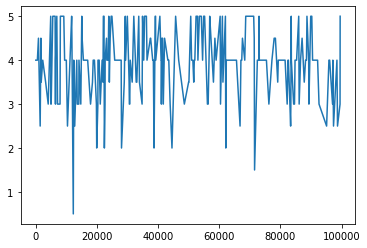

In [80]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Vamos mudar o tipo de gráfico para realizar uma análise mais adequada.

Para isso apenas alteraremos o parâmetro **kind** do método `.plot`. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

**Toy Story**

Text(0.5, 1.0, 'Avaliações do filme Toy Story')

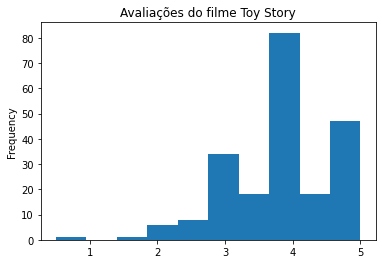

In [81]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')

**Jumanji**

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

**Filme aleatório escolhido com ID == 102084**

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

##Hipóteses

A primeira coisa que precisamosnoa atentar ao usar gráficos é o que cada eixo do gráfico significa. 

No exemplo acima por exemplo, o eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada). 

Entendios esses parâmetros do gráfico, vamos contextualizar o cenário que estamos analisando:

- Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro (animação da liga da justiça). 
- Um fato nos chamou a atenção: a animação da Liga da Justiça tinha média de nota 5. **Será que Justice League: Doom é um filme tão bom assim?** Num primeiro momento parecia que ele realmente era popular. Mas ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. 

Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

- Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.

##**Desafios**

**Desafio 1** do Paulo Silveira


O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?  Determine quantos filmes não tem avaliações e quais são esses filmes.


**Desafio 2** do Guilherme Silveira


Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

**Desafio 3** do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

**Desafio 4** do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

**Desafio 5** do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

**Desafio 6** da Thais André

Contar o número de aparições de cada genero.

**Desafio 7** do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

**As respostas dos desafios podem ser encontradas [aqui](https://github.com/leticiagomescs/QuarentenaDados-Alura/blob/master/Aula%201:%20Python%2C%20Pandas%20e%20Colab/Desafios-Aula_01.ipynb)**